In [ ]:
import torch

In [ ]:
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cuda Tesla T4


#Generate data

In [ ]:
# N=100, x=-5000~5000 step 100, y=3x^2 + 25x + 580
lstX = []
lstY = []
for x in range(-5000, 5000, 100):
  lstX.append([x])
  y = 3*x*x + 25*x + 580
  lstY.append([y])

#Split input data to train and test data

In [ ]:
import numpy as np
numpyX = np.array(lstX)
numpyY = np.array(lstY)
print(numpyX.shape, numpyY.shape)

(100, 1) (100, 1)


In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY_hat, testY_hat = train_test_split(numpyX, numpyY, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY_hat.shape, testY_hat.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


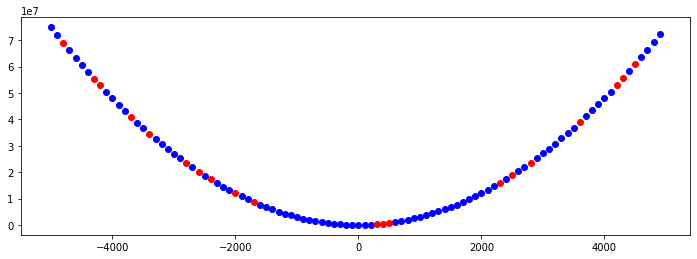

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.scatter(trainX, trainY_hat, color = "blue")
plt.scatter(testX, testY_hat, color = "red")
plt.show()

# Build NN

In [ ]:
import torch.nn as nn

In [ ]:
MyNet = nn.Sequential(
    nn.Linear(1, 30),
    nn.ReLU(),
    nn.Linear(30, 15),
    nn.ReLU(),
    nn.Linear(15, 1),
)
MyNet.to(device)
print(MyNet)

Sequential(
  (0): Linear(in_features=1, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=15, bias=True)
  (3): ReLU()
  (4): Linear(in_features=15, out_features=1, bias=True)
)


In [ ]:
loss_func = torch.nn.MSELoss()

In [ ]:
optimizer = torch.optim.Adam(MyNet.parameters(), lr=0.005)

# train one step

In [ ]:
tensorX = torch.FloatTensor(trainX).to(device)
tensorY_hat = torch.FloatTensor(trainY_hat).to(device)

In [ ]:
tensorY  = MyNet(tensorX)
loss = loss_func(tensorY , tensorY_hat)
print(float(loss))
optimizer.zero_grad()
loss.backward()
optimizer.step()

1066317771702272.0


# Training Loop

In [ ]:
lossLst = []
for epoch in range(1, 2000):
    tensorY = MyNet(tensorX)
    loss = loss_func(tensorY_hat, tensorY)
    loss1 = float(loss)
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

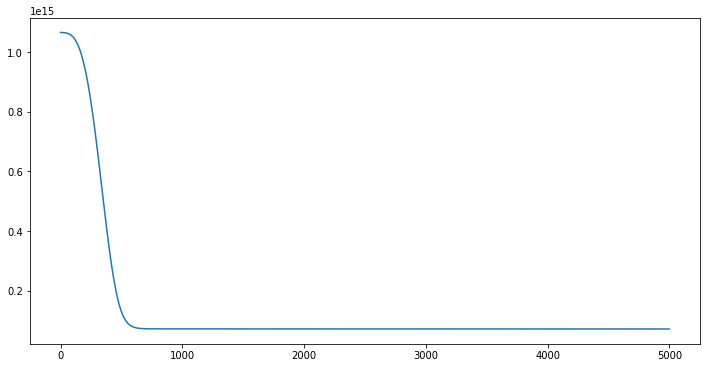

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(lossLst)
plt.show()

# Test 

In [ ]:
tensorX = torch.FloatTensor(testX).to(device)
tensorY_hat = torch.FloatTensor(testY_hat).to(device)
tensorY = MyNet(tensorX)
loss = loss_func(tensorY, tensorY_hat)
print("%.2f" % (float(loss)), end = ", ")

64023714332672.00, 

In [ ]:
testY = tensorY.detach().cpu().numpy()

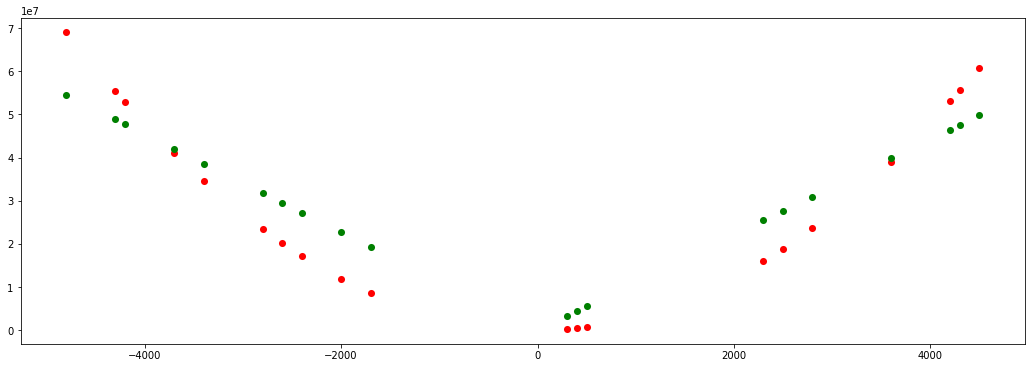

In [ ]:
plt.figure(figsize=(18, 6))
plt.scatter(testX, testY_hat, s=50, lw=0, color="red")
plt.scatter(testX, testY, s=50, lw=0, color="green")
plt.show()

#Read data from excel file

In [1]:
# prepare an excel data file
# N= 100, x=-5000 ~ 5000, step 100, y=3x^2 + 25x + 580

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

In [ ]:
import pandas as pd
df=pd.read_excel(fname)

In [ ]:
df.head(5)

In [ ]:
df.columns

In [ ]:
dfX = df[['x']]
dfY = df[['y']]

In [ ]:
X = np.array(dfX.values)
Y = np.array(dfY.values)

# Split input data to train and test data

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.20, random_state=0)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)